<a href="https://colab.research.google.com/github/me-dalii/computer_vision_sandbox/blob/main/retina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

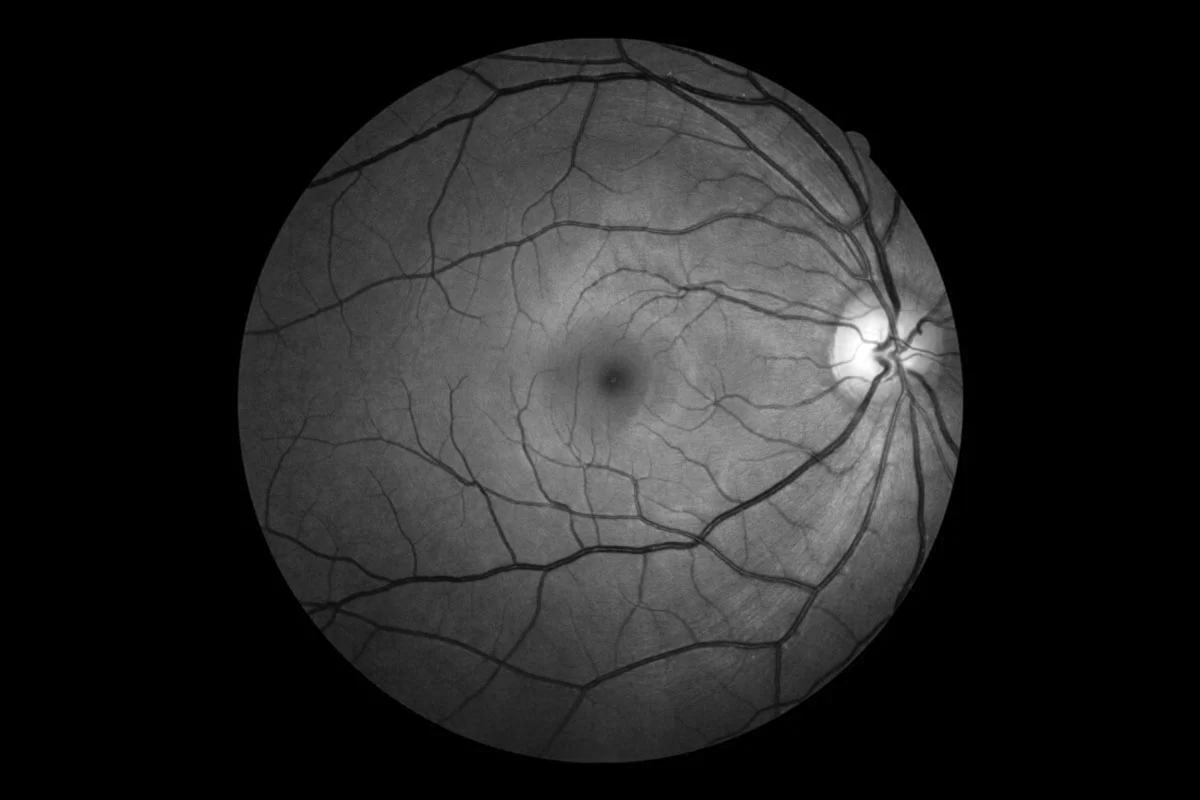

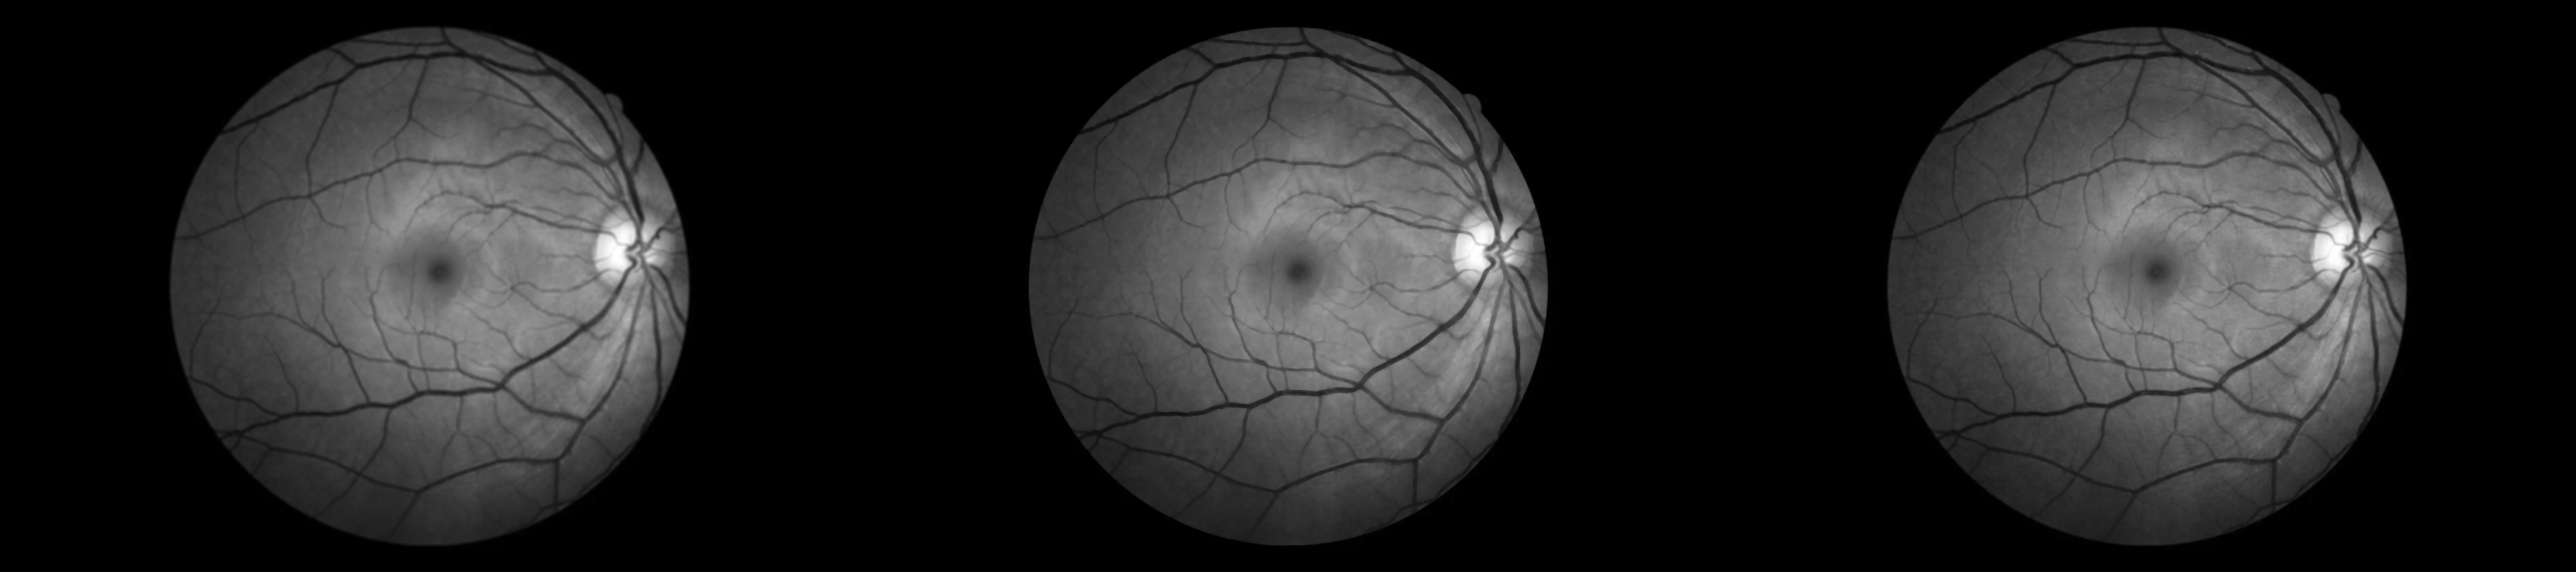

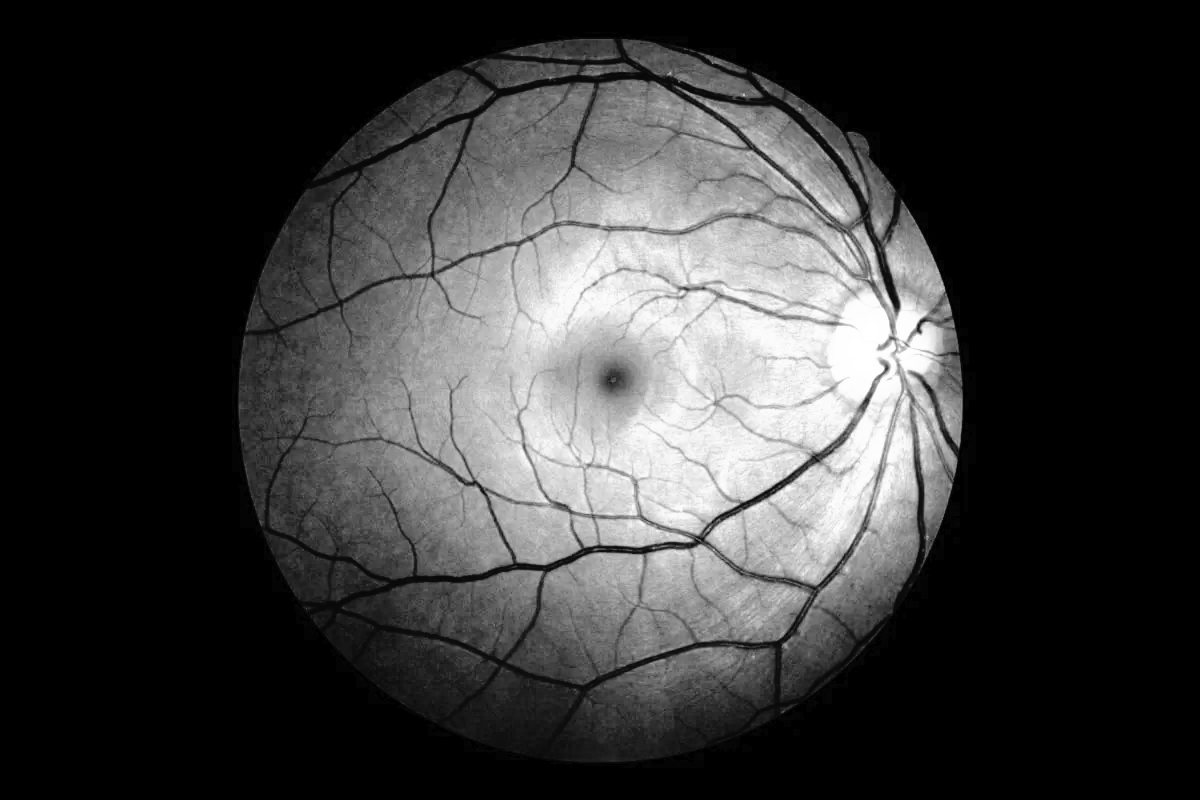

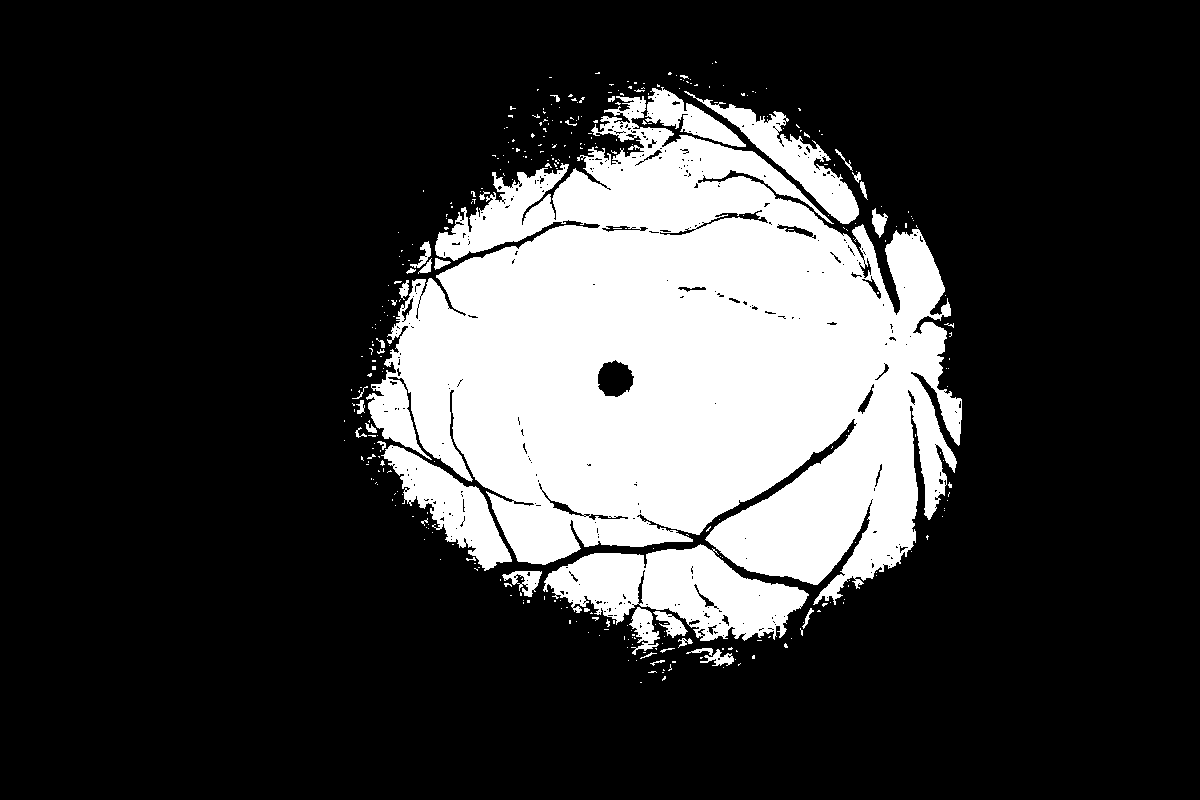

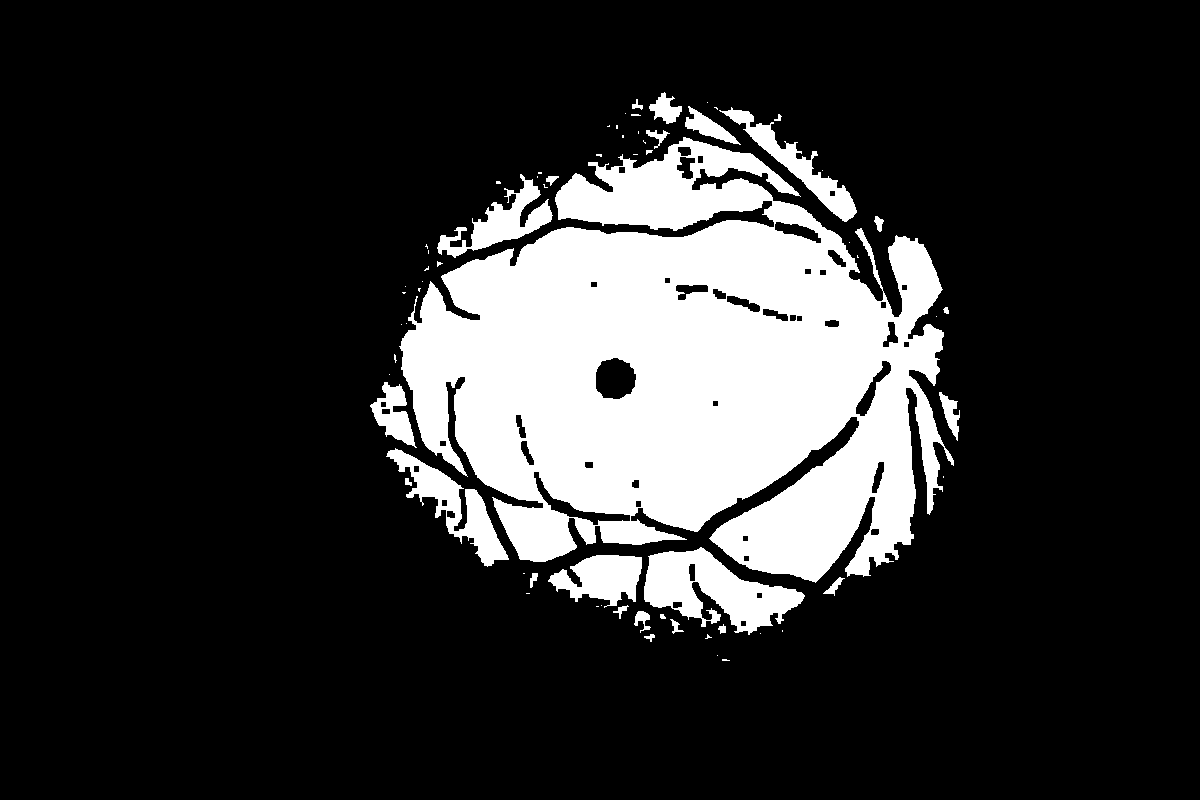

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Ouvrir l'image du fond de l'œil
image_path = 'retina.jpg'
retina_image = cv2.imread(image_path)

# Extraire le canal vert
green_channel = retina_image[:, :, 1]

# Filtrer l'image avec un filtre moyenneur, un filtre médian et un filtre gaussien
average_filtered = cv2.blur(green_channel, (5, 5))
median_filtered = cv2.medianBlur(green_channel, 5)
gaussian_filtered = cv2.GaussianBlur(green_channel, (5, 5), 0)

# Améliorer le contraste de l'image (par exemple, égalisation de l'histogramme)
equalized_image = cv2.equalizeHist(green_channel)

# Binariser les images pour segmenter le disque optique (utilisez une méthode appropriée)
ret, binary_image = cv2.threshold(equalized_image, 127, 255, cv2.THRESH_BINARY)

# Appliquer la morphologie mathématique pour extraire le réseau vasculaire de la rétine
# Vous devrez définir des éléments structurants de différentes tailles et directions
kernel1 = np.ones((3, 3), np.uint8)
kernel2 = np.ones((5, 5), np.uint8)

dilated_image = cv2.dilate(binary_image, kernel1, iterations=1)
eroded_image = cv2.erode(binary_image, kernel2, iterations=1)

# À ce stade, vous pouvez combiner les résultats de la morphologie mathématique
final_result = cv2.bitwise_and(dilated_image, eroded_image)

# Afficher les images ou les sauvegarder selon vos besoins
cv2_imshow(green_channel)
cv2_imshow(np.hstack([average_filtered, median_filtered, gaussian_filtered]))
cv2_imshow(equalized_image)
cv2_imshow(binary_image)
cv2_imshow(final_result)

cv2.waitKey(0)
cv2.destroyAllWindows()
